## Observations and Insights 

Three observations that can be made from the following data are:
1. Out of all treatments that were tested, there was more data available for Capomulin and Ramicane. It could be beneficial to look at these two regimens more closely as opposed to other regimens because the more data, the better snapshot we can get of the regimen's study results. 
2. The average tumor volume was generally lower in mice who were treated with Capomulin and Ramicane rather than Infubinol and Ceftamin which may indicate greater success in the Capomulin and Ramicane regimens OR these deviations could be related to the fact that there is not as much data on Infubinol and Ceftamin as there is on Capomulin and Ramicane
3. Weight seems to be highly positively correlated with tumor volume. Generalyy, as a mouse's weight became greater, so did it's average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(study_results.head())
mouse_metadata.head()

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Combine the data into a single dataset
combined_mouse_and_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_and_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_mouse_and_study.value_counts("Mouse ID"))

249

In [4]:
### Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#grouping by Mouse ID to have something to use in a conditional to identify which mice IDs only have 1 Timepoint
grouped_data = combined_mouse_and_study.groupby(["Mouse ID"])
#counting the grouped data by Timepoint so we know which IDs have exactly 1 timepoint entry 
grouped_data = grouped_data["Timepoint"].count()
#filtering out the mouse IDs that have more than one timepoint
unique_ids = list(grouped_data[grouped_data ==1].index)
unique_ids

['b447',
 'd133',
 'f932',
 'h428',
 'l872',
 'n482',
 'o848',
 't573',
 'u153',
 'v199',
 'x226',
 'x336']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

#creating new DataFrame to input all the duplicates' data into
duplicate_data = pd.DataFrame()
#run a for loop for all the mouse IDs and if the ID isn't in the "Unique IDs" list then it's a duplicate
for item in combined_mouse_and_study["Mouse ID"].unique():
    if item not in list(unique_ids):
        #if the ID is a duplicate then get all that data for that Mouse ID and add it to the empty DataFrame we created earlier
        duplicate_df = combined_mouse_and_study[combined_mouse_and_study["Mouse ID"] == item]
        duplicate_data = duplicate_data.append(duplicate_df)
    
#reset the index and re-order the columns
duplicate_data = duplicate_data.reset_index()[["Mouse ID", "Drug Regimen", "Sex", "Age_months",
                             "Weight (g)", "Timepoint", "Tumor Volume (mm3)",
                             "Metastatic Sites"]]
#show our data frame to make sure our loop did what we intended
duplicate_data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_mouse_and_study.drop_duplicates("Mouse ID", keep = False).reset_index()
cleaned_data = cleaned_data.drop("index", axis = 1)
cleaned_data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b447,Ceftamin,Male,2,30,0,45.0,0
1,d133,Zoniferol,Male,5,30,0,45.0,0
2,f932,Ketapril,Male,15,29,0,45.0,0
3,h428,Ketapril,Female,1,27,0,45.0,0
4,l872,Placebo,Male,19,30,0,45.0,0
5,n482,Propriva,Female,4,29,0,45.0,0
6,o848,Stelasyn,Female,14,27,0,45.0,0
7,t573,Ceftamin,Female,15,27,0,45.0,0
8,u153,Ceftamin,Female,11,25,0,45.0,0
9,v199,Naftisol,Female,17,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data.value_counts())

12

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following 
#properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_clean_data = cleaned_data.groupby("Drug Regimen")
tumor_vol_per_regimen = {"Regimen": list(grouped_clean_data["Tumor Volume (mm3)"].mean().index), 
                         "Mean":list(grouped_clean_data["Tumor Volume (mm3)"].mean()),
                         "Median":list(grouped_clean_data["Tumor Volume (mm3)"].median()),
                         "Variance":list(grouped_clean_data["Tumor Volume (mm3)"].var(ddof=0)),
                         "Standard Deviation":list(grouped_clean_data["Tumor Volume (mm3)"].std(ddof=0)),
                         "SEM":list(grouped_clean_data["Tumor Volume (mm3)"].sem(ddof=0))}

tumor_vol_per_regimen = pd.DataFrame(tumor_vol_per_regimen)
tumor_vol_per_regimen.head()


,Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ceftamin,45.0,45.0,0.0,0.0,0.0
1,Ketapril,45.0,45.0,0.0,0.0,0.0
2,Naftisol,45.0,45.0,0.0,0.0,0.0
3,Placebo,45.0,45.0,0.0,0.0,0.0
4,Propriva,45.0,45.0,0.0,0.0,0.0


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_vol_per_regimen = cleaned_data.aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']}, axis = 0)

#agg_tumor_vol_per_regimen = pd.DataFrame(tumor_vol_per_regimen)
agg_tumor_vol_per_regimen.head()

,Tumor Volume (mm3)
mean,45.0
median,45.0
var,0.0
std,0.0
sem,0.0


## Bar and Pie Charts

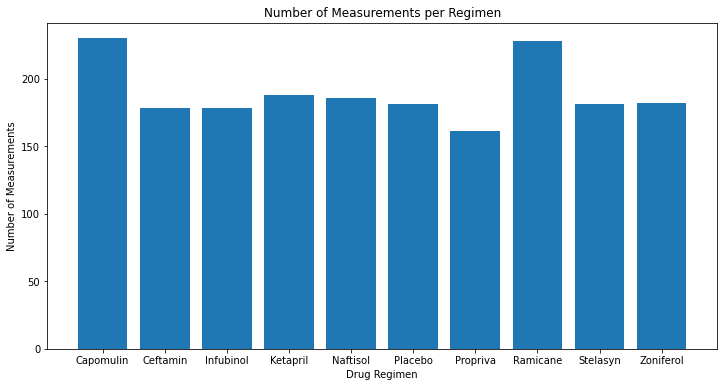

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_measurements = combined_mouse_and_study.groupby("Drug Regimen").count()["Mouse ID"]
x_axis = np.arange(0, len(num_measurements)+1)

fig, ax = plt.subplots(figsize = (12, 6));
ax.bar(num_measurements.index, list(num_measurements));
ax.set(title = "Number of Measurements per Regimen", 
      xlabel = "Drug Regimen", 
      ylabel = "Number of Measurements");

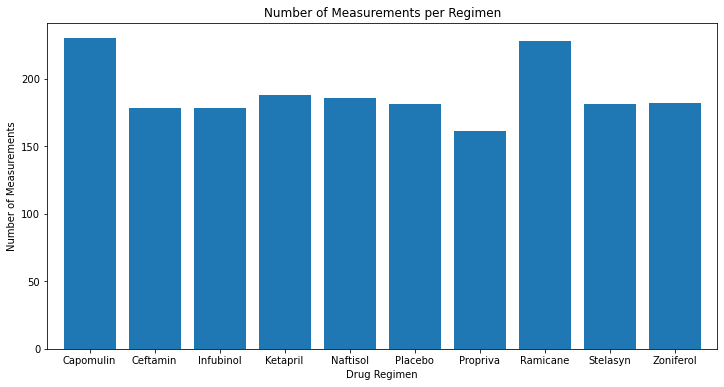

In [11]:
# Generate a bar plot showing the total number of measurements taken on each 
#drug regimen using pyplot.
num_measurements.plot(kind='bar', figsize = (12,6), title = "Number of Measurements per Regimen", 
                      ylabel="Number of Measurements", width = 0.8);
plt.xticks(rotation=0);

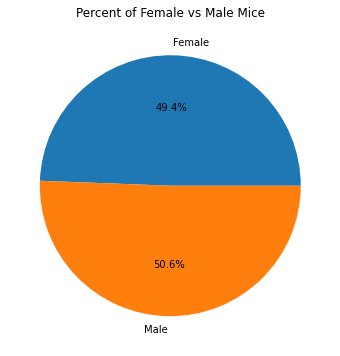

In [12]:
# Generate a pie plot showing the distribution of female versus male mice 
#using pandas

perc_gender = combined_mouse_and_study.groupby("Sex").count()["Mouse ID"]
x_axis = np.arange(0, len(num_measurements)+1)

fig2, ax2 = plt.subplots(figsize = (12, 6));
ax2.pie(perc_gender, labels = perc_gender.index, autopct = "%1.1f%%");
ax2.set(title = "Percent of Female vs Male Mice");

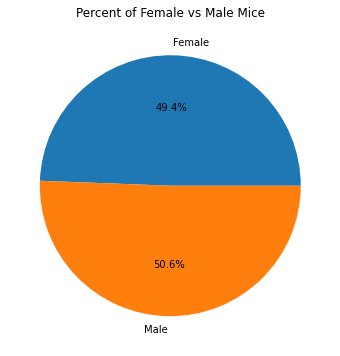

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

perc_gender.plot(kind="pie", figsize = (6,6), autopct = "%1.1f%%", ylabel = "", title = "Percent of Female vs Male Mice");

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

latest_data = pd.DataFrame()
for item in combined_mouse_and_study["Mouse ID"].unique():
    latest_df = combined_mouse_and_study[combined_mouse_and_study["Mouse ID"] == item]
    latest_data = latest_data.append(latest_df.iloc[-1])
    
latest_data = latest_data.reset_index()[["Mouse ID", "Drug Regimen", "Sex", "Age_months",
                             "Weight (g)", "Timepoint", "Tumor Volume (mm3)",
                             "Metastatic Sites"]]
latest_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,45.0,22.050126,1.0
1,s185,Capomulin,Female,3.0,17.0,45.0,23.343598,1.0
2,x401,Capomulin,Female,16.0,15.0,45.0,28.484033,0.0
3,m601,Capomulin,Male,22.0,17.0,45.0,28.430964,1.0
4,g791,Ramicane,Male,11.0,16.0,45.0,29.128472,1.0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
IQR_stats = combined_mouse_and_study["Tumor Volume (mm3)"].describe()
Q1 = IQR_stats['25%']
Q3 = IQR_stats['75%']
IQR = Q3-Q1
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol_df = latest_data[latest_data["Drug Regimen"] == drug]
    # add subset
    tumor_vol_data.append(list(tumor_vol_df["Tumor Volume (mm3)"])) 
#flat_tumor_vol_data = [item for sublist in tumor_vol_data for item in sublist]
# Determine outliers using upper and lower bounds
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

outliers=[]
for item in tumor_vol_data:
    for vol in item:
        if vol < lower_bound or vol > upper_bound:
            outliers.append(vol)
len(outliers)

2

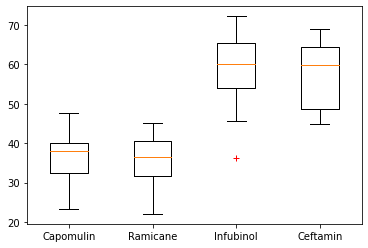

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots();
ax.boxplot(tumor_vol_data, labels = treatments, sym = "r+");

## Line and Scatter Plots

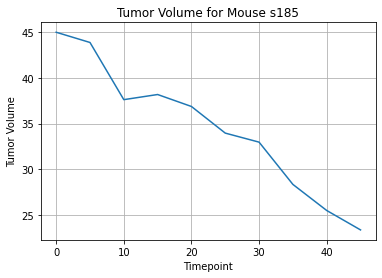

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#grabbing the first mouse id for mice that we
cap_df = combined_mouse_and_study[combined_mouse_and_study["Drug Regimen"]=='Capomulin']
mouse_id_cap = cap_df.iloc[0]['Mouse ID']
data = combined_mouse_and_study[combined_mouse_and_study["Mouse ID"] == mouse_id_cap]
data

fig2, ax2 = plt.subplots();
ax2.plot(data['Timepoint'], data['Tumor Volume (mm3)']);
ax2.set(title = f'Tumor Volume for Mouse {mouse_id_cap}', 
       xlabel = "Timepoint", 
       ylabel = "Tumor Volume");
ax2.grid();

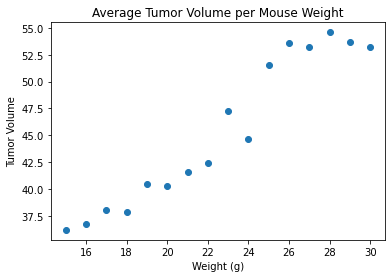

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weights = combined_mouse_and_study['Weight (g)'].unique()
avg_tumor = []
for weight in weights:
    weight_avg = combined_mouse_and_study[combined_mouse_and_study["Weight (g)"]==weight]["Tumor Volume (mm3)"].mean()
    avg_tumor.append(weight_avg)
    
fig3, ax3 = plt.subplots()
ax3.scatter(weights, avg_tumor);
ax3.set(title = "Average Tumor Volume per Mouse Weight", 
       xlabel = "Weight (g)", 
       ylabel = "Tumor Volume");

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(weights, avg_tumor)[0], 2)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, avg_tumor)
regress_values = weights*slope + intercept

0.96


The r-squared is: 0.926558679698155


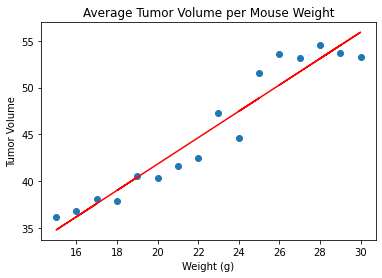

In [31]:
fig4, ax4 = plt.subplots()
ax4.scatter(weights, avg_tumor)
ax4.set(title = "Average Tumor Volume per Mouse Weight", 
       xlabel = "Weight (g)", 
       ylabel = "Tumor Volume");
ax4.plot(weights, regress_values, "r-");
print(f"The r-squared is: {rvalue**2}")